<a href="https://colab.research.google.com/github/GurjotSinghC/Qis-Kit-Gurjot-Singh-Project/blob/main/Gurjot_Singh_Quantum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Suggested Reading

As mentioned above, there are various online resources at [qiskit.org](https://qiskit.org) and [quantum-computing.ibm.com](https://quantum-computing.ibm.com/). In particular, the following online textbook is recommended.

* [Learn Quantum Computation using Qiskit](https://qiskit.org/textbook/)

In addition, the following paperback book is recommended.

* H. Norl&eacute;n: [*Quantum Computing in Practice with Qiskit and IBM Quantum Experience*](https://www.packtpub.com/product/quantum-computing-in-practice-with-qiskit-and-ibm-quantum-experience/9781838828448) (Packt, 2020).
Source codes can be obtained at [github](https://github.com/PacktPublishing/Quantum-Computing-in-Practice-with-Qiskit-and-IBM-Quantum-Experience).

In [ ]:
import qiskit
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# QiskitRuntimeService.save_account(token ="IbSLGAOswopnbxJl7KZj4bIApqXqrzGFIzg65C82DJ7F")
service = QiskitRuntimeService()
print(service.active_account)


qiskit_runtime_service.__init__:WARNING:2026-01-11 01:36:32,578: Instance was not set at service instantiation. Free and trial plan instances will be prioritized. Based on the following filters: (tags: None, region: us-east, eu-de), and available plans: (open), the available account instances are: open-instance. If you need a specific instance set it explicitly either by using a saved account with a saved default instance or passing it in directly to QiskitRuntimeService().


<bound method QiskitRuntimeService.active_account of <QiskitRuntimeService>>


### Qiskit Demo: Creating and Simulating a Bell State

This script demonstrates how to create a simple quantum circuit (a Bell state), simulate it using Qiskit's Aer simulator, and visualize the measurement results.

In [ ]:
# Install qiskit-aer if not already installed
# !pip install qiskit-aer

# Import necessary Qiskit components
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

print("Qiskit components imported successfully.")

Qiskit components imported successfully.


In [ ]:

backend = service.least_busy(operational=True)
print(backend)
# Create a circuit with a register of three qubits
circ = QuantumCircuit(3)
# H gate on qubit 0, putting this qubit in a superposition of |0> + |1>.
circ.h(0)
# A CX (CNOT) gate on control qubit 0 and target qubit 1 generating a Bell state.
circ.cx(0, 1)
# CX (CNOT) gate on control qubit 0 and target qubit 2 resulting in a GHZ state.
circ.cx(0, 2)
# Draw the circuit
circ.draw('mpl')

In [ ]:
## Transpile
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager


qcoin = QuantumCircuit(1)
qcoin.h(0)
qcoin.measure_all()

qcoin.draw("mpl")


target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)

qc_isa = pm.run(qcoin)

## Execute

# On real hardware:
sampler = Sampler(mode=backend)
pubs = [qc_isa]
job = sampler.run(pubs, shots=1000)
res = job.result()

counts = res[0].data.meas.get_counts()

# or with Aer simulator with noise model from real backend
# job = sampler_sim.run([qc_isa])
# counts=job.result()[0].data.meas.get_counts()

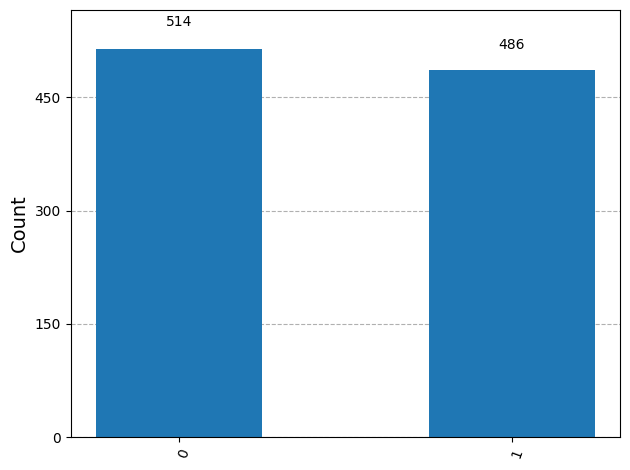

In [ ]:
## Analysis
from qiskit.visualization import plot_histogram

plot_histogram(counts)